# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']


### Now take a look at the shapes of the X and y matricies 

In [2]:
display(X.shape)
display(y.shape)

(70000, 784)

(70000,)

### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [3]:
X[36000]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

In [4]:
import matplotlib.pyplot as plt

x = X.reshape(-1,28,28)

def plot_number(df_number):
    
    return plt.imshow(df_number, cmap = plt.cm.binary, interpolation="nearest")

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

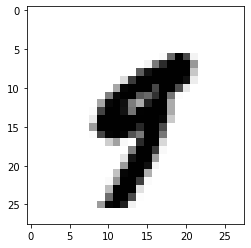

In [5]:
plot_number(x[36000])

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [44]:
X_train_numbers = X[:60000]
X_test_numbers = X[60000:]

y_train_numbers = y[:60000]
y_test_numbers = y[60000:]


### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [45]:
#if the number is 5, we put a "1" and if the number is not 5, we put "0"
y_train_numbers = [1 if a == '5' else 0  for a in y_train_numbers]

y_test_numbers = [1 if a == '5' else 0 for a in y_test_numbers]


### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [46]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train_numbers, y_train_numbers)

/home/ivan/miniconda3/envs/IronHack_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [47]:
y_regression_pred = lr.predict(X_test_numbers)
y_regression_pred

array([0, 0, 0, ..., 0, 1, 0])

### Does the classifier predict correctly the 36000th digit we picked before?

In [48]:
#This question does not make sense, because we have used the digit 36000 to train the models 
# (we partitioned 60000 (train) and 10000 (test))

lr.predict(X[36000:36001])

#when predicting it, we get "0" so this digit is not a 5

array([0])

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [49]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [50]:
never_5_clf.fit(X_train_numbers, y_train_numbers)
y_never_pred = never_5_clf.predict(X_test_numbers)
y_never_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [53]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

display(confusion_matrix(y_test_numbers, y_regression_pred))
print(f'the precision score of regression is: {precision_score(y_test_numbers, y_regression_pred)}')
print(f'the recall score of regression is: {recall_score(y_test_numbers, y_regression_pred)}')
print(f'the f1 score of regression is: {f1_score(y_test_numbers, y_regression_pred)}')

array([[9034,   74],
       [ 147,  745]])

the precision score of regression is: 0.9096459096459096
the recall score of regression is: 0.8352017937219731
the f1 score of regression is: 0.8708357685563999


In [54]:
display(confusion_matrix(y_test_numbers, y_never_pred))
print(f'the precision score of never model is: {precision_score(y_test_numbers, y_never_pred)}')
print(f'the recall score of never model is: {recall_score(y_test_numbers, y_never_pred)}')
print(f'the f1 score of never model is: {f1_score(y_test_numbers, y_never_pred)}')

array([[9108,    0],
       [ 892,    0]])

the precision score of never model is: 0.0
the recall score of never model is: 0.0
the f1 score of never model is: 0.0


In [ ]:
#

### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

### Now find the roc_auc_score for each. 

### What does this metric tell you? Which classifier works better with this metric in mind?